# Exploring the Bitcoin Cryptocurrency Market

In [1]:
## Importing libraries
import pandas as pd
import matplotlib.pyplot as plt

### 1. Bitcoin and Cryptocurrencies: Full dataset, filtering, and reproducibility

In [2]:
## Loading dataset
df=pd.read_csv('datasets/coinmarketcap_06122017.csv')
df.head()

,Unnamed: 0,24h_volume_usd,available_supply,id,last_updated,market_cap_usd,max_supply,name,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,rank,symbol,total_supply
0,0,9.007640e+09,1.672352e+07,bitcoin,1512549554,2.130493e+11,2.100000e+07,Bitcoin,0.12,7.33,17.45,1.000000,12739.500000,1,BTC,1.672352e+07
1,1,1.551330e+09,9.616537e+07,ethereum,1512549553,4.352945e+10,NaN,Ethereum,-0.18,-3.93,-7.33,0.036177,452.652000,2,ETH,9.616537e+07
2,2,1.111350e+09,1.684044e+07,bitcoin-cash,1512549578,2.529585e+10,2.100000e+07,Bitcoin Cash,1.65,-5.51,-4.75,0.120050,1502.090000,3,BCH,1.684044e+07
3,3,2.936090e+09,2.779530e+09,iota,1512549571,1.475225e+10,2.779530e+09,IOTA,-2.38,83.35,255.82,0.000424,5.307460,4,MIOTA,2.779530e+09
4,4,2.315050e+08,3.873915e+10,ripple,1512549541,9.365343e+09,1.000000e+11,Ripple,0.56,-3.70,-14.79,0.000019,0.241754,5,XRP,9.999309e+10


In [3]:
## Selecting the 'id' and'market_cap_usd' columns
market_cap_raw=df[['id', 'market_cap_usd']]
market_cap_raw.count()

id                1326
market_cap_usd    1031
dtype: int64

Use count() to count and print the number of values in market_cap_usd. the count numbers of id and market_cap different. It is because some cryptocurrencies listed have no known market cap, this is represented by NaN, and NaN are not counted by count(). These cryptocirrencies are of little interest in this analysis, so they are safe to remove

### 2. Discard the cryptocurrencies without a market capitalization

In [4]:
## Filtering out rows without a maketcapitalization
cap=market_cap_raw[market_cap_raw['market_cap_usd']>0]

##Counting the number of values again
cap.count()

id                1031
market_cap_usd    1031
dtype: int64

### 3. How big is Bitcoin compared with the rest of the cryptocurrencies?

Bitcoin is more competition from other projects, and it is still dominant in market capitalization. Let's plot the market capitalization for the top 10 coins as a barplot visualize this.

In [5]:
## Selecting the first 10 rows and setting the index
cap10=cap[:10].set_index('id')
cap10

,market_cap_usd
id,
bitcoin,2.130493e+11
ethereum,4.352945e+10
bitcoin-cash,2.529585e+10
iota,1.475225e+10
ripple,9.365343e+09
dash,5.794076e+09
litecoin,5.634498e+09
bitcoin-gold,4.920065e+09
monero,4.331688e+09


In [6]:
##Calculating percentage of market capitalization for each coint using assign()
#and assign it to cap10
cap10=cap10.assign(market_cap_perc=lambda x: (x.market_cap_usd/cap.market_cap_usd.sum())*100)
cap10

,market_cap_usd,market_cap_perc
id,,
bitcoin,2.130493e+11,56.918669
ethereum,4.352945e+10,11.629410
bitcoin-cash,2.529585e+10,6.758088
iota,1.475225e+10,3.941238
ripple,9.365343e+09,2.502063
dash,5.794076e+09,1.547956
litecoin,5.634498e+09,1.505323
bitcoin-gold,4.920065e+09,1.314454
monero,4.331688e+09,1.157262


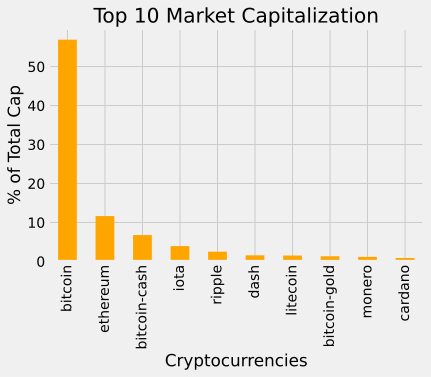

In [7]:
##PLoting the barplot
plt.figure(figsize=(8,6))
%matplotlib inline
%config InlineBackend.figure_format = 'svg' 
plt.style.use('fivethirtyeight')


cap10['market_cap_perc'].plot(kind='bar', color='orange')
plt.title('Top 10 Market Capitalization')
plt.xlabel('Cryptocurrencies')
plt.ylabel('% of Total Cap')
plt.show()

### 4. Making the plot easier to read and more informative

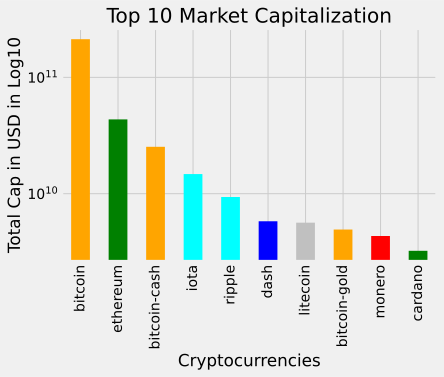

In [8]:
colors=['orange', 'green', 'orange', 'cyan', 'cyan', 'blue', 'silver', 'orange', 'red', 'green']

cap10['market_cap_usd'].plot(kind='bar', logy=True, color=colors)
plt.title('Top 10 Market Capitalization')
plt.xlabel('Cryptocurrencies')
plt.ylabel('Total Cap in USD in Log10')
plt.show()


### 5. What is going on?! Volatility in cryptocurrencies

The cryptocurrencies market has been spectacularly volatile since the first exchange opened. This notebook didn't start with a big, bold warning for nothing. I just explore this volatility a bit more by selecting and plotting the 24 hours and 7 days percentage change, which it has alrealdy available.

In [9]:
volatility=df[['id','percent_change_24h','percent_change_7d']]
volatility.head()

,id,percent_change_24h,percent_change_7d
0,bitcoin,7.33,17.45
1,ethereum,-3.93,-7.33
2,bitcoin-cash,-5.51,-4.75
3,iota,83.35,255.82
4,ripple,-3.70,-14.79


In [10]:
##Setting 'id' as index and drop all NaN rows
volatility24h=volatility.set_index('id').dropna(axis=0, how='any')

##Sorting the datafram by percent_change_24h in ascending order
volatility24h=volatility24h.sort_values('percent_change_24h')
volatility24h

,percent_change_24h,percent_change_7d
id,,
flappycoin,-95.85,-96.61
credence-coin,-94.22,-95.31
coupecoin,-93.93,-61.24
tyrocoin,-79.02,-87.43
petrodollar,-76.55,542.96
...,...,...
eaglecoin,272.50,114.73
beatcoin,295.49,132.79
bitzeny,416.04,3360.71


### 6. Well, we can already see that things are *a bit* crazy

Make a bar plot that shows the biggest gainers and the biggest losers. Finish writing the function that will show the top losers to the left and the top gainers to the right.

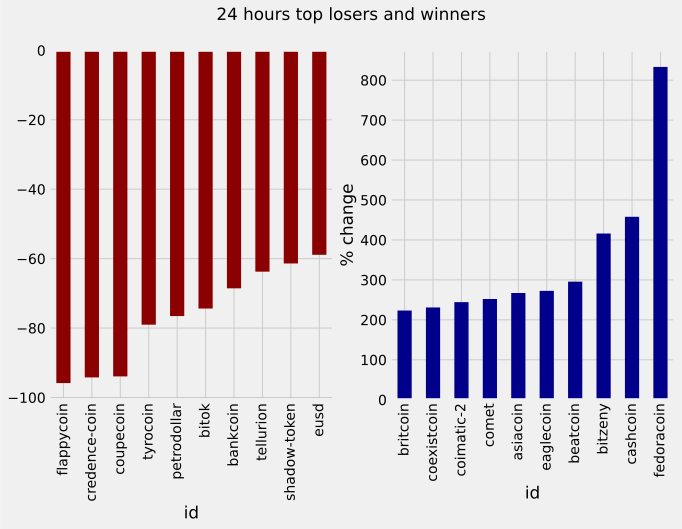

In [11]:
# Defining a function with 2 parameters, the series to plot and the title
def top10_subplot(volatility_series, title):
    # making the subplot and the figure for nrows and ncolumns
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
    
    # Plotting with pandas the barchart for the top 10 losers with the color RED
    ax = volatility_series[:10].plot.bar(color="darkred", ax=axes[0])
    
    # Same as above, but for the top 10 winners and in darkblue
    ax = volatility_series[-10:].plot.bar(color="darkblue", ax=axes[1])
    
    # Setting the main title to TITLE
    fig.suptitle(title)
    # Setting the ylabel to "% change"
    ax.set_ylabel('% change')
    
    
    # Returning this for good practice, might use later
    return fig, ax

DTITLE = "24 hours top losers and winners"

# Calling the function above with the volatility.percent_change_24h series
# and title DTITLE 
fig, ax = top10_subplot(volatility24h['percent_change_24h'], DTITLE)

### 7. Ok, those are... interesting. Let's check the weekly Series too.

In [12]:
volatility7d=volatility.set_index('id').dropna(axis=0, how='any')
volatility7d=volatility7d.sort_values('percent_change_7d')
volatility7d

,percent_change_24h,percent_change_7d
id,,
royalties,-9.06,-99.59
flappycoin,-95.85,-96.61
credence-coin,-94.22,-95.31
cagecoin,-36.26,-92.68
tyrocoin,-79.02,-87.43
...,...,...
yoyow,119.59,547.12
comet,252.07,560.46
btcmoon,-34.70,582.11


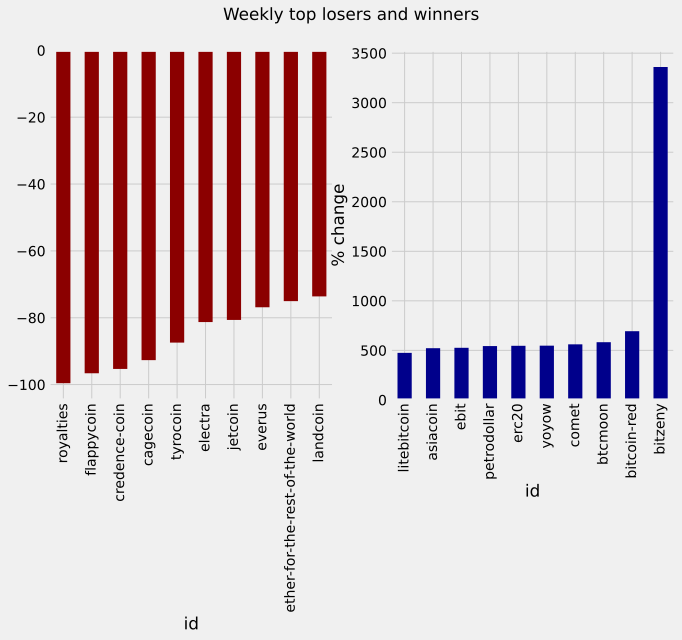

In [13]:
WTITLE = "Weekly top losers and winners"

# Calling the top10_subplot function
fig, ax = top10_subplot(volatility7d['percent_change_7d'], WTITLE);

### 8. How small is small?

In [14]:
##Selecting everything bigger than 10 billion
largecap=market_cap_raw[market_cap_raw['market_cap_usd']>1E+10]
largecap

,id,market_cap_usd
0,bitcoin,2.130493e+11
1,ethereum,4.352945e+10
2,bitcoin-cash,2.529585e+10
3,iota,1.475225e+10


In [15]:
##These are the market cap definitions from Investopedia:

## Large cap: +10 billion
## Mid cap: 2 billion - 10 billion
## Small cap: 300 million - 2 billion
## Micro cap: 50 million - 300 million
## Nano cap: Below 50 million

### 9. Most coins are tiny

In [16]:
def capcount(query_string):
    return cap.query(query_string).count().id

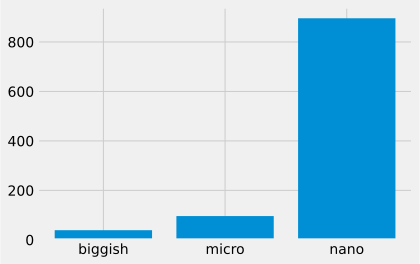

In [17]:
# Labels for the plot
LABELS = ["biggish", "micro", "nano"]

# Using capcount count the not_so_small cryptos
biggest = capcount("market_cap_usd > 3E+8")

# Same as above for micro ...
micro = capcount("market_cap_usd >= 5E+7 & market_cap_usd < 3E+8")

# ... and for nano
nano =  capcount("market_cap_usd < 5E+7")

# Making a list with the 3 counts
values = [biggest, micro, nano]

# Plotting them with matplotlib 
plt.bar(range(len(values)), values, tick_label=LABELS);